In [1]:
import zarr
import netCDF4
import h5py
import numpy as np
from IPython.display import Image

writable = np.random.rand(10,10,1)

In [3]:
%%prun -r -D data/profiling/profile_open_zarr -q

ds_zarr = zarr.open(store="data/test_dataset.zarr",mode="r+" ,zarr_version=2)

 
*** Profile stats marshalled to file 'data/profile_open_zarr'.


In [12]:
%%prun -r -D data/profiling/profile_read_zarr -q

tmp = ds_zarr["x"][100_000]

 
*** Profile stats marshalled to file 'data/profile_read_zarr'.


In [4]:
%%prun -r -D data/profiling/profile_write_zarr -q

ds_zarr["x"][100_000] = writable

 
*** Profile stats marshalled to file 'data/profiling/profile_write_zarr'.


In [ ]:
%%prun -r -D data/profiling/profile_open_netcdf4 -q

ds_netcdf4 = netCDF4.Dataset("data/test_dataset.nc", mode="r+", format="NETCDF4")

In [73]:
%%prun -r -D data/profiling/profile_read_netcdf4 -q

tmp = ds_netcdf4.variables["x"][100_000]

 
*** Profile stats marshalled to file 'data/profiling/profile_read_netcdf4'.


In [74]:
%%prun -r -D data/profiling/profile_write_netcdf4 -q
ds_netcdf4.variables["x"][100_000] = writable

 
*** Profile stats marshalled to file 'data/profiling/profile_write_netcdf4'.


In [75]:
%%prun -r -D data/profiling/profile_open_hdf5 -q

ds_hdf5 = h5py.File("data/test_dataset.h5", mode="r+")

 
*** Profile stats marshalled to file 'data/profiling/profile_open_hdf5'.


In [76]:
%%prun -r -D data/profiling/profile_read_hdf5 -q

 tmp = ds_hdf5.get("x")[100_000]

 
*** Profile stats marshalled to file 'data/profiling/profile_read_hdf5'.


In [77]:
%%prun -r -D data/profiling/profile_write_hdf5 -q

ds_hdf5.get("x")[100_000] = writable

 
*** Profile stats marshalled to file 'data/profiling/profile_write_hdf5'.


In [5]:
%%sh 
gprof2dot -f pstats data/profiling/profile_open_zarr | dot -Tpng -o images/profile_open_zarr.png
gprof2dot -f pstats data/profiling/profile_read_zarr | dot -Tpng -o images/profile_read_zarr.png
gprof2dot -f pstats data/profiling/profile_write_zarr | dot -Tpng -o images/profile_write_zarr.png

gprof2dot -f pstats data/profiling/profile_open_netcdf4 | dot -Tpng -o images/profile_open_netcdf4.png
gprof2dot -f pstats data/profiling/profile_read_netcdf4 | dot -Tpng -o images/profile_read_netcdf4.png
gprof2dot -f pstats data/profiling/profile_write_netcdf4 | dot -Tpng -o images/profile_write_netcdf4.png

gprof2dot -f pstats data/profiling/profile_open_hdf5 | dot -Tpng -o images/profile_open_hdf5.png
gprof2dot -f pstats data/profiling/profile_open_hdf5 | dot -Tpng -o images/profile_read_hdf5.png
gprof2dot -f pstats data/profiling/profile_open_hdf5 | dot -Tpng -o images/profile_write_hdf5.png

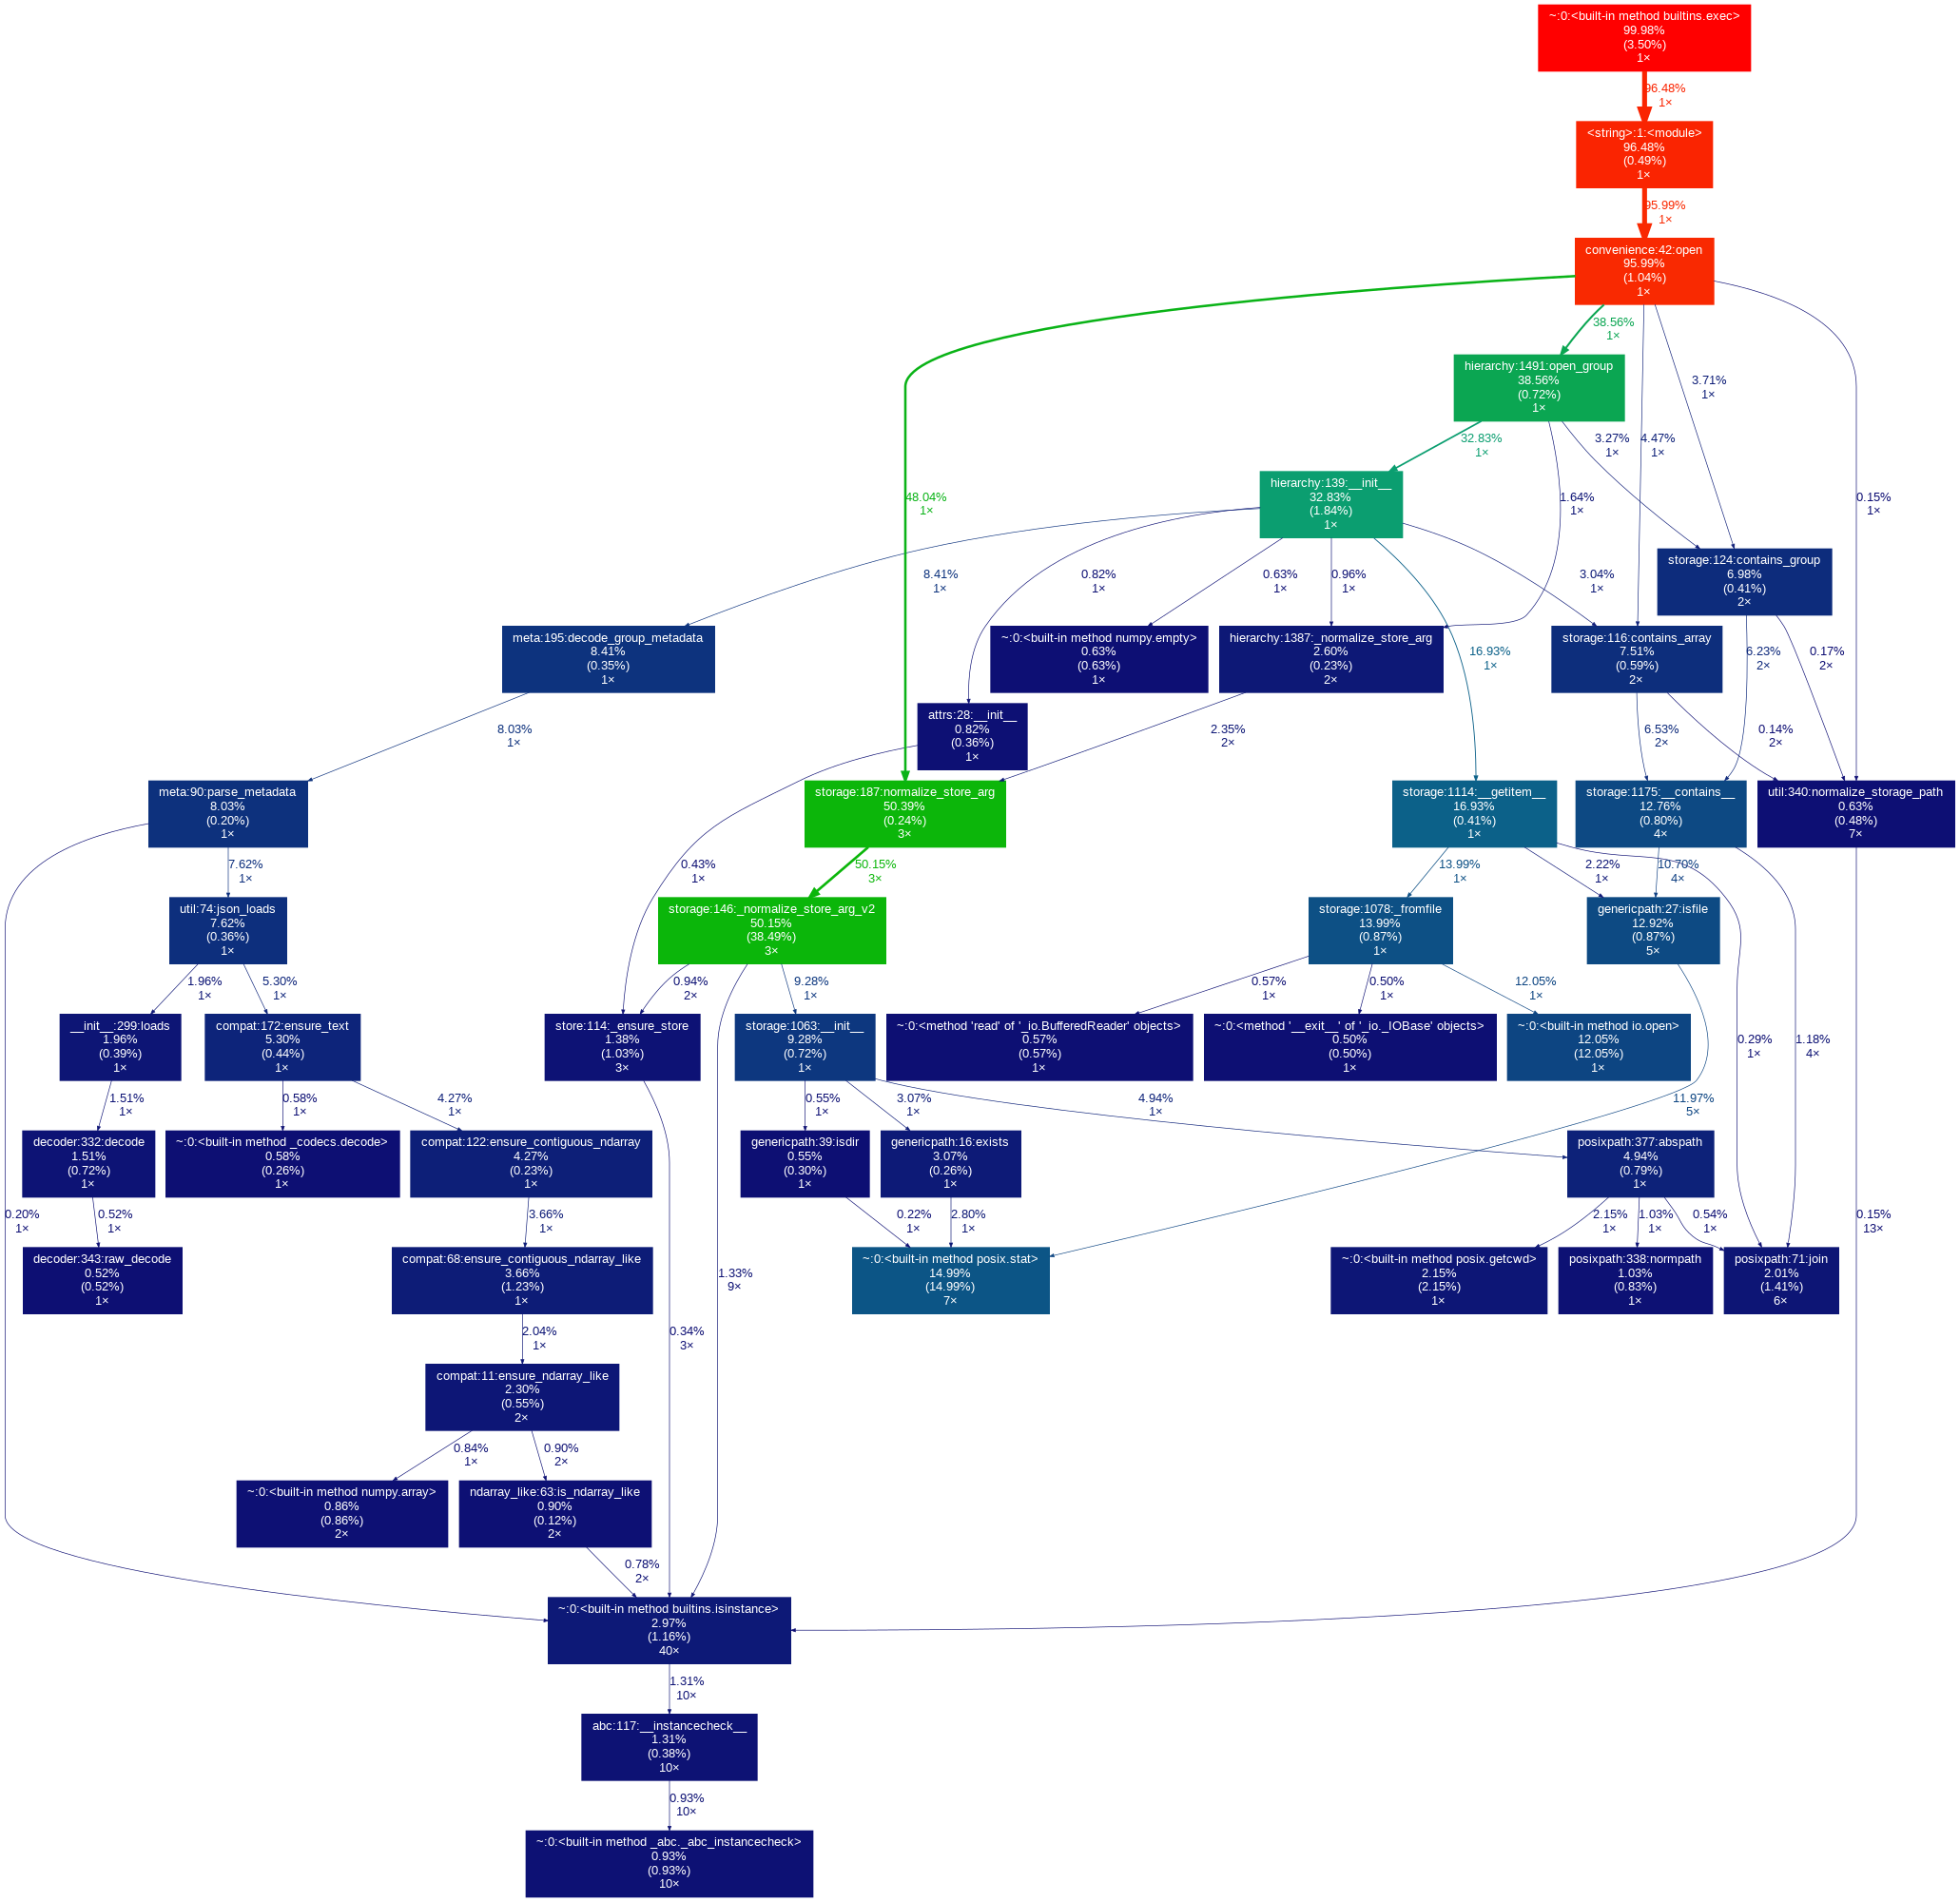

In [79]:
Image("images/profile_open_zarr.png")


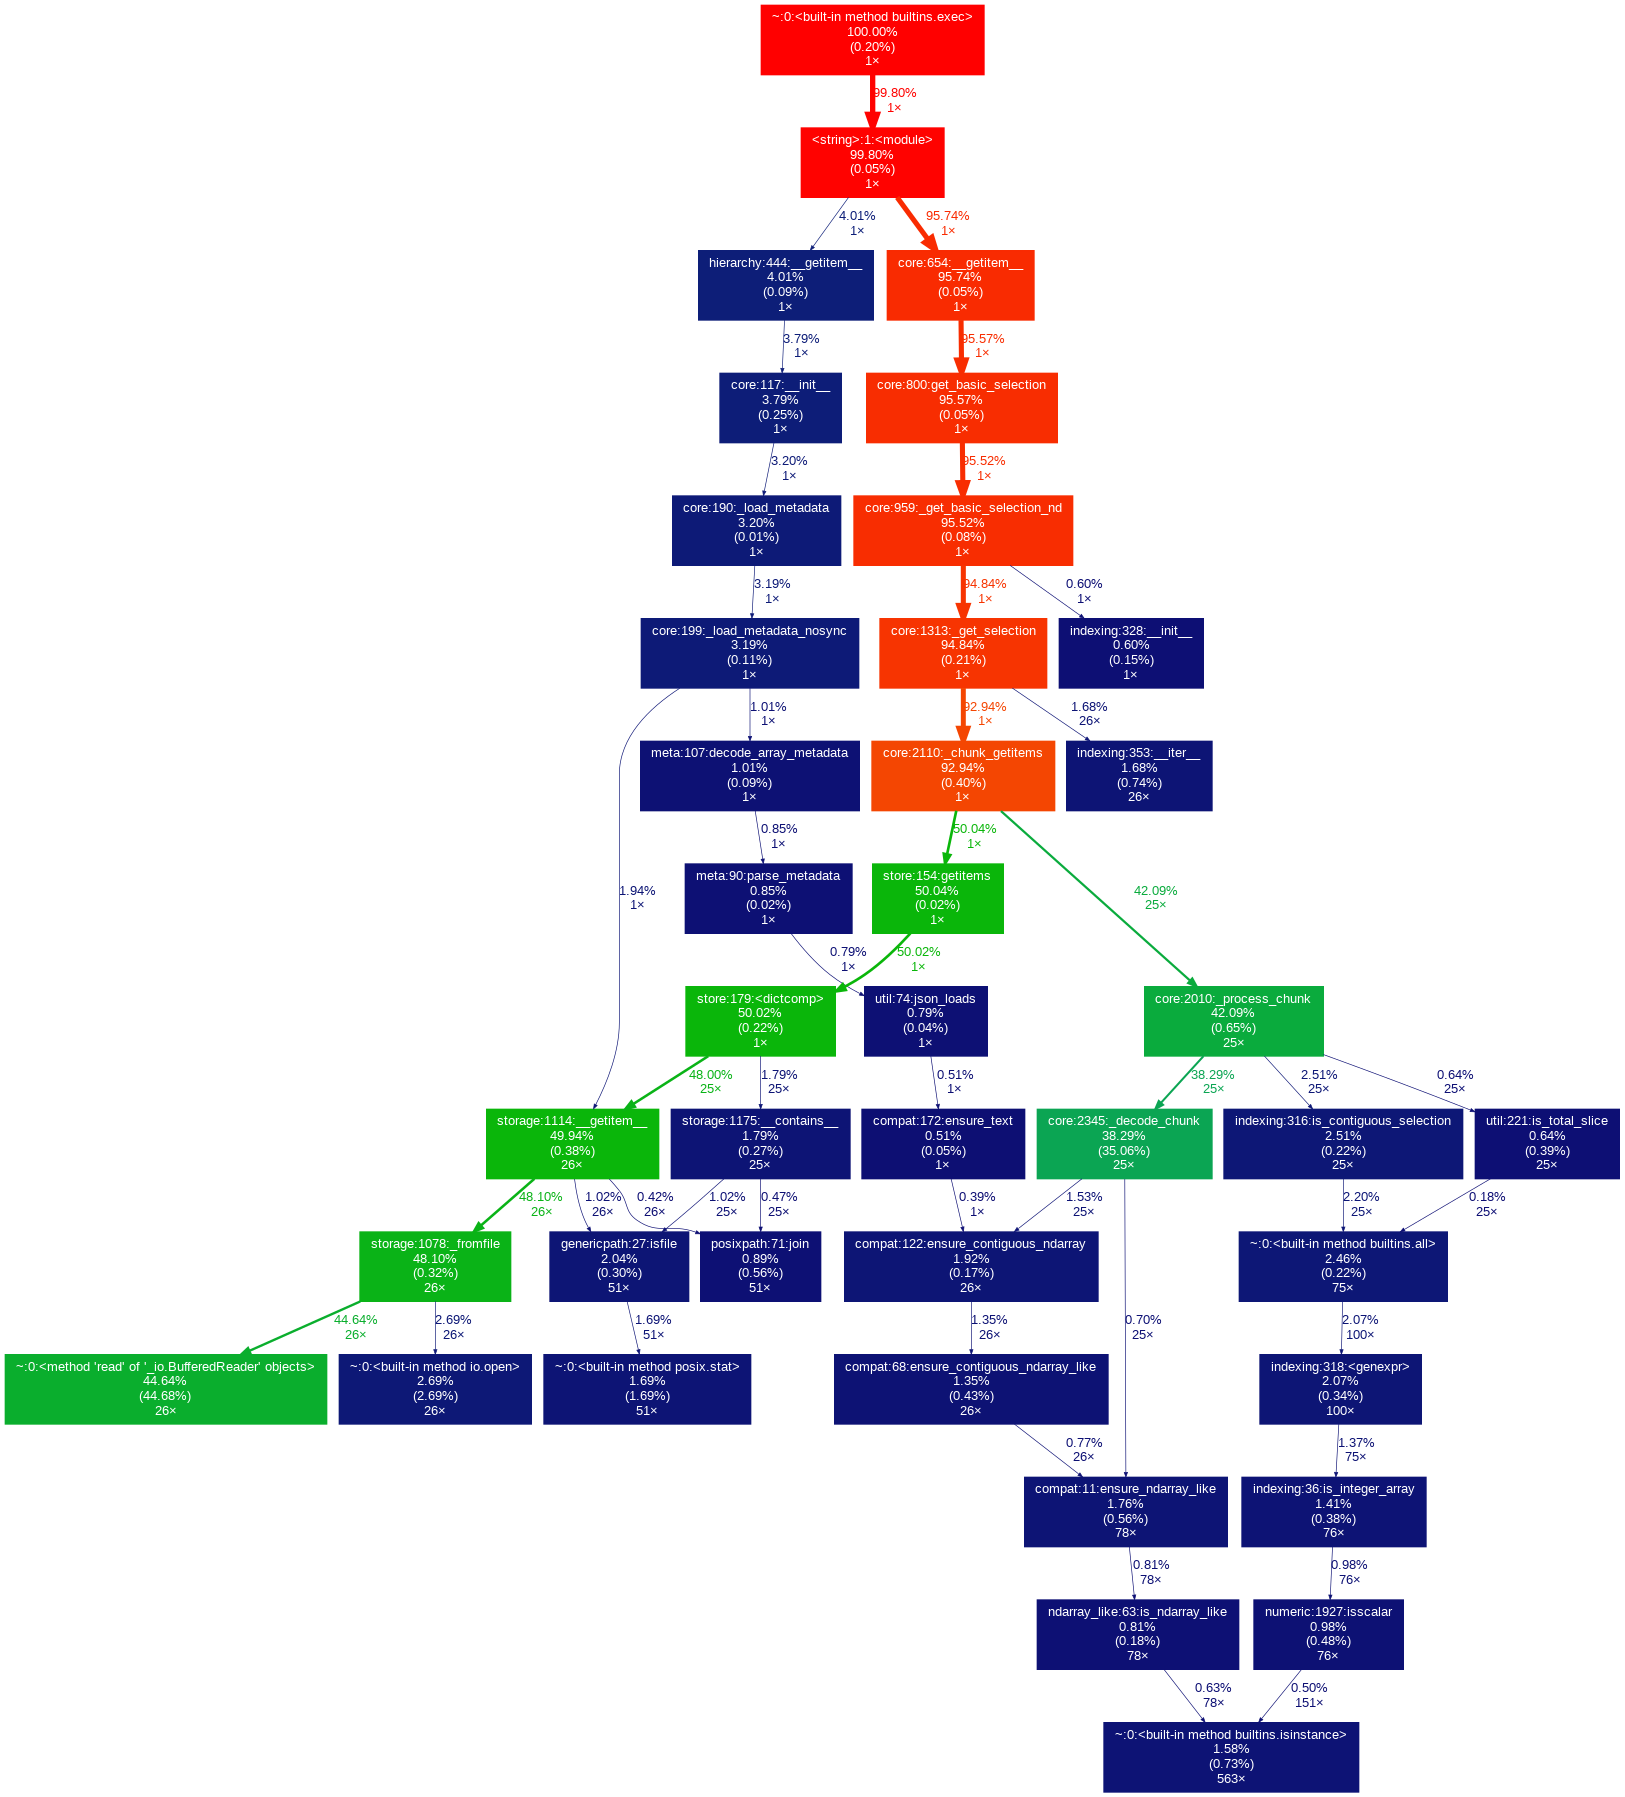

In [80]:
Image("images/profile_read_zarr.png")


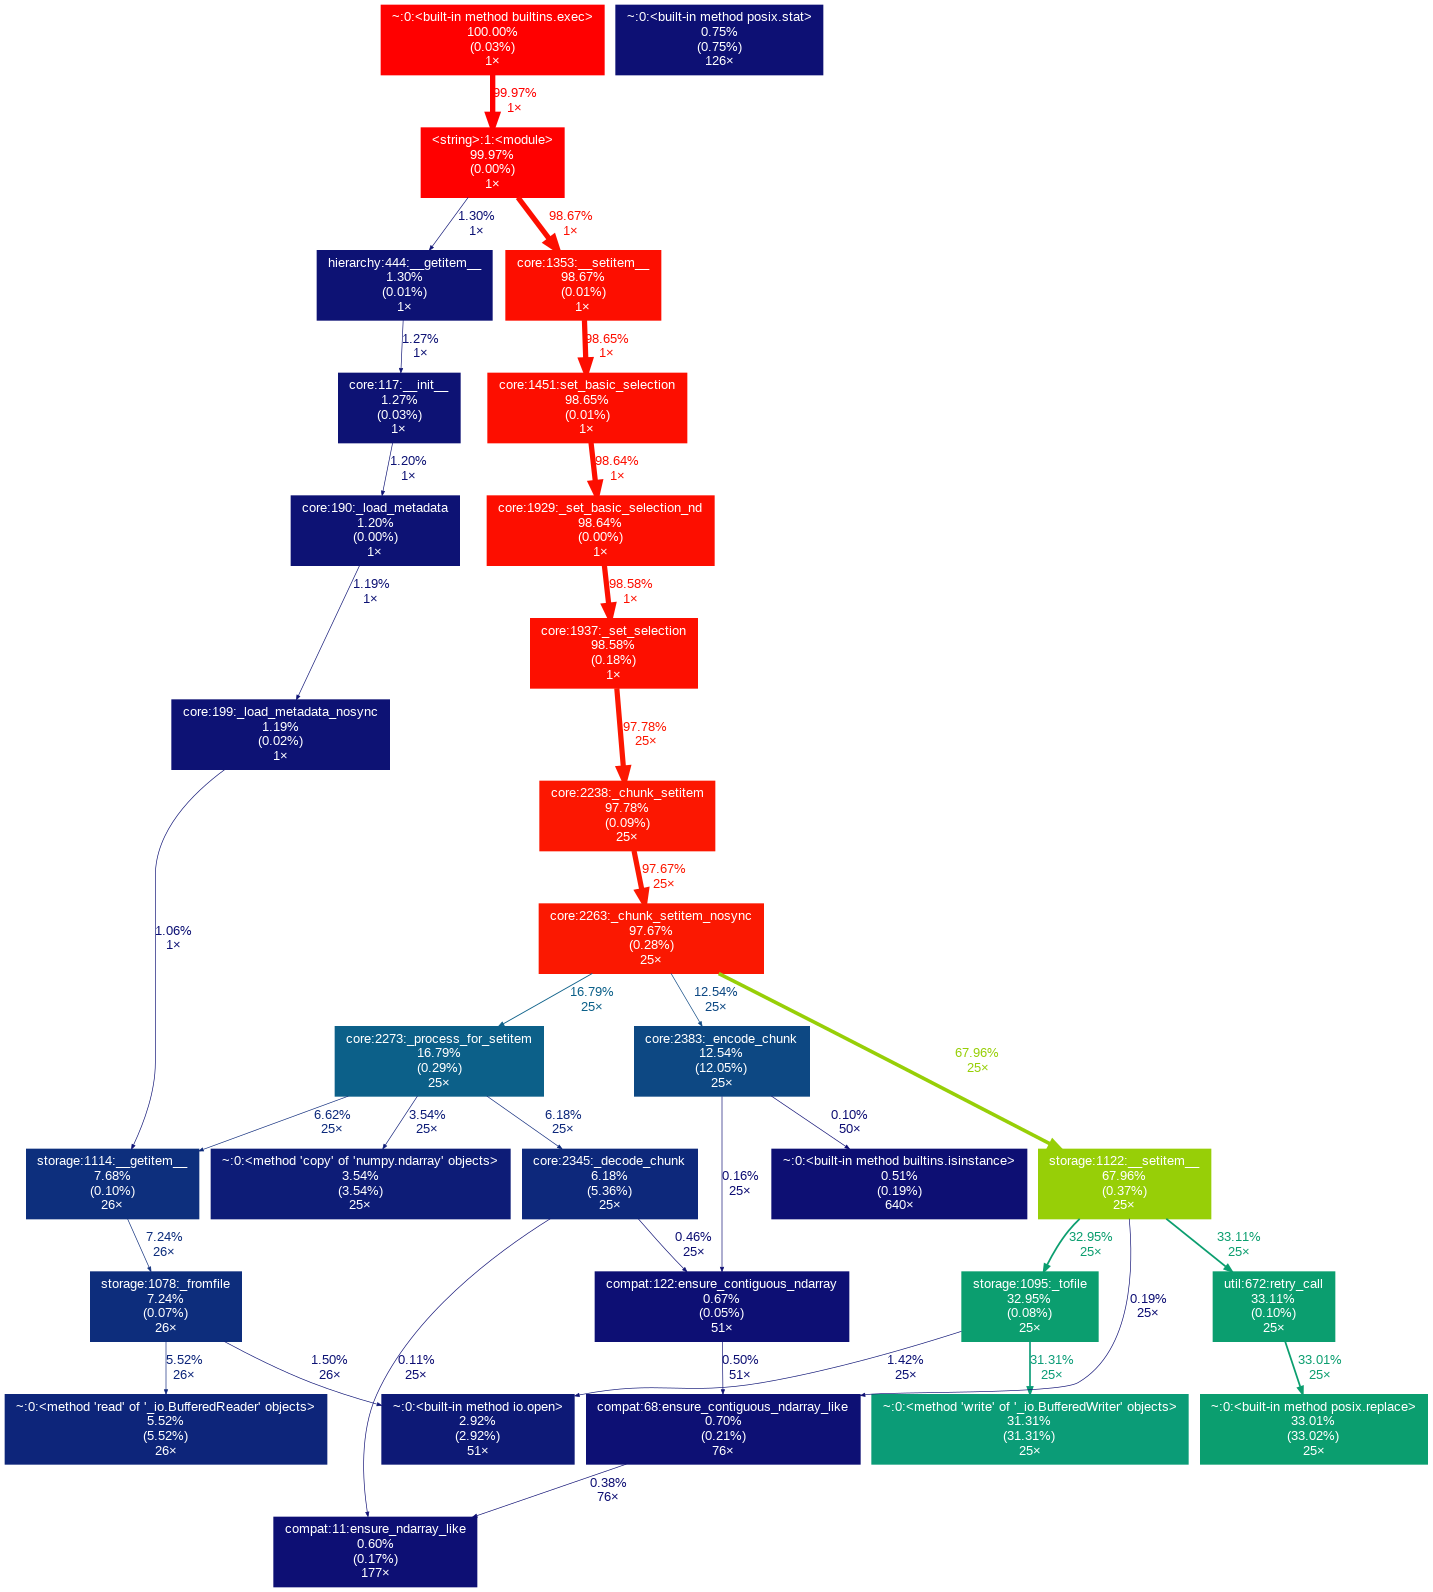

In [6]:
Image("images/profile_write_zarr.png")


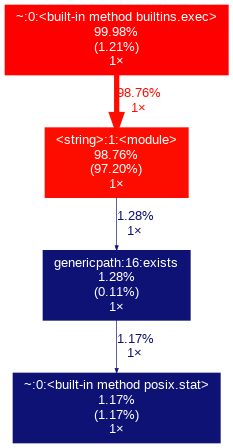

In [82]:

Image("images/profile_open_netcdf4.png")


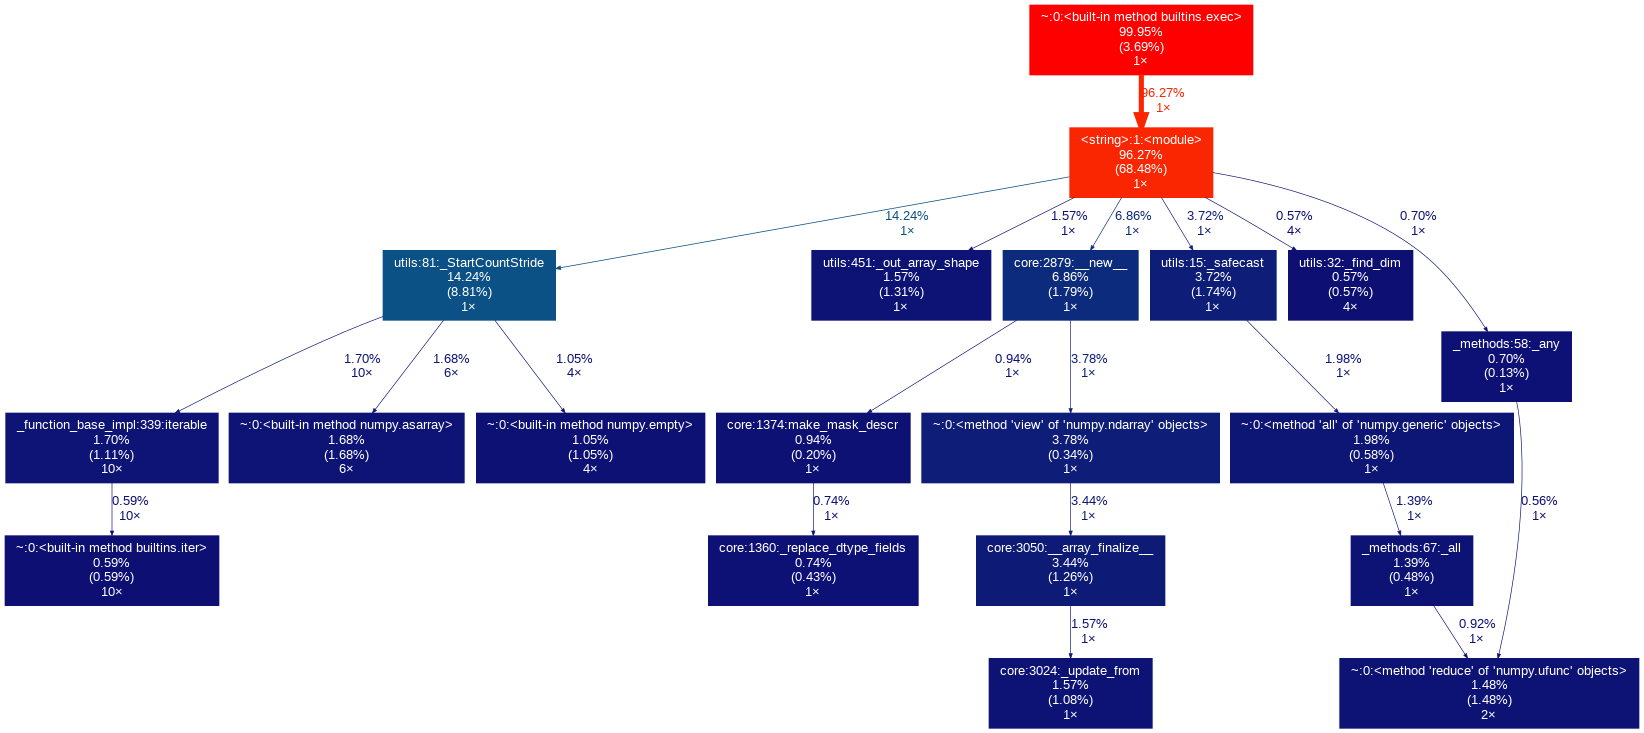

In [83]:
Image("images/profile_read_netcdf4.png")


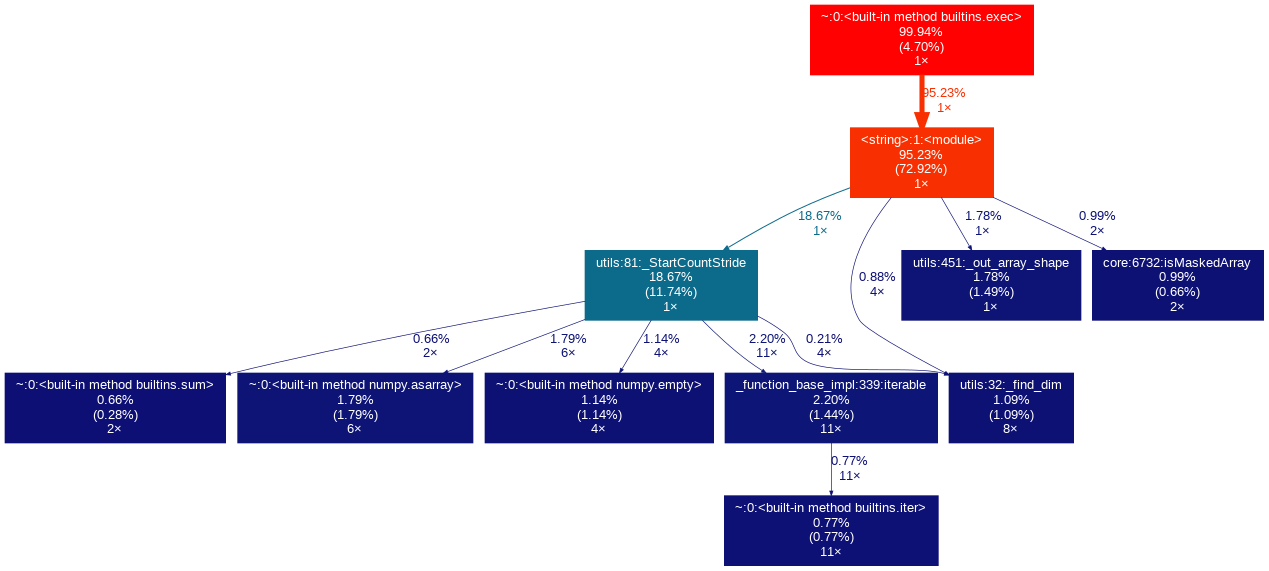

In [84]:
Image("images/profile_write_netcdf4.png")


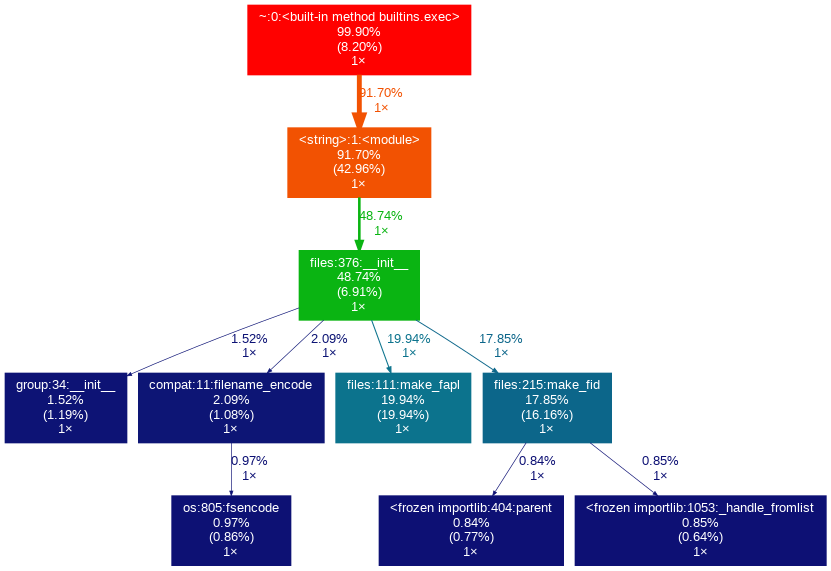

In [85]:

Image("images/profile_open_hdf5.png")


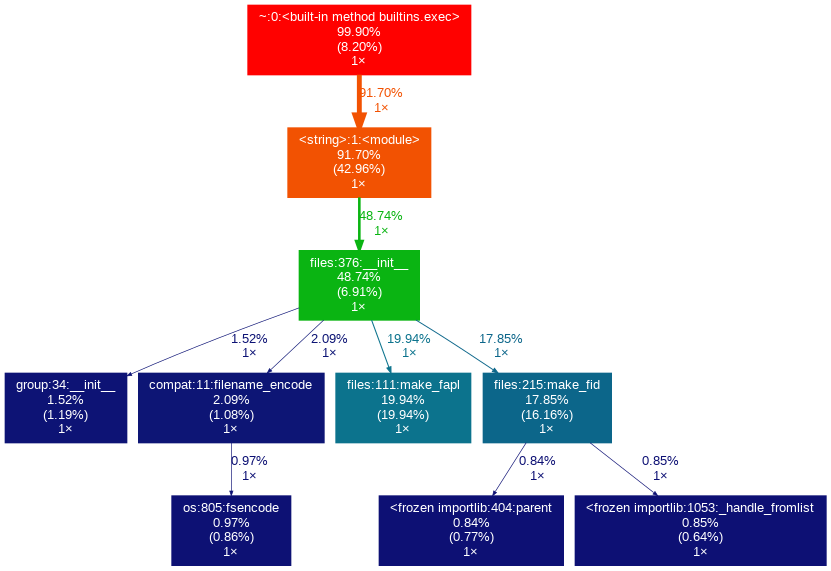

In [86]:
Image("images/profile_read_hdf5.png")


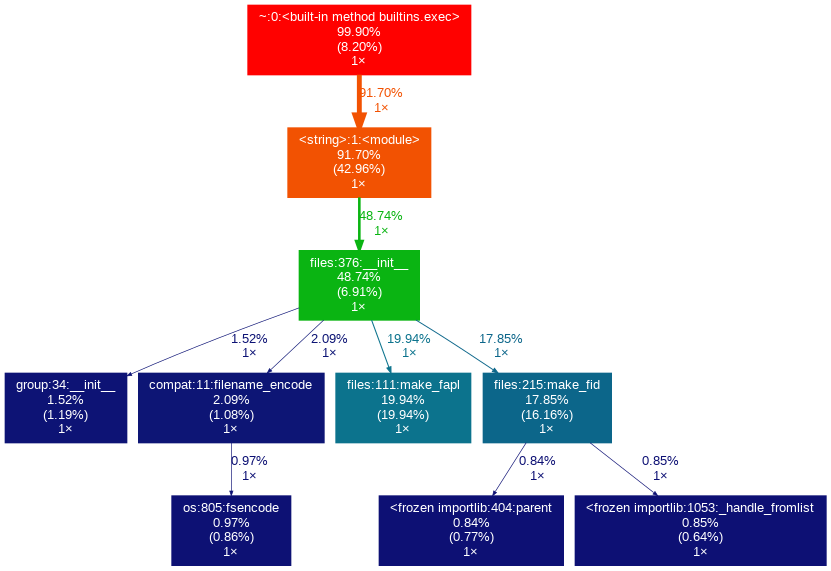

In [87]:
Image("images/profile_write_hdf5.png")